In [1]:
#pip install pandas

In [2]:
#pip install matplotlib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## Functions

In [4]:
def count_all_animals(animals_dict):
    total_count = sum(len(values) for values in animals_dict.values())
    print(total_count)



In [5]:

def check_accuracy(csv_path, animals_dict):

    animals_dict = {key.lower(): [animal.lower() for animal in animals] for key, animals in animals_dict.items()}
    data = pd.read_csv(csv_path, header=None, names=['file_path', 'label'])
    data['label'] = data['label'].str.strip().str.lower()

    count = 0
    total = 0

    for index, row in data.iterrows():

        path_parts = row['file_path'].split('/')
        if len(path_parts) > 2:
            animal_name = path_parts[-2].strip().lower()  

            # Check if the label and animal name match in the dictionary
            if row['label'] in animals_dict and animal_name in animals_dict[row['label']]:
                count += 1
        total += 1

    accuracy = count / total if total > 0 else 0
    return round(accuracy * 100, 2)

## Base 80 Animals

In [6]:

def base_accuracy(csv_path):
    animals_list = [
    "Bear", "Brown Bear", "Bull", "Butterfly", "Camel", "Canary", "Caterpillar", 
    "Cattle", "Centipede", "Cheetah", "Chicken", "Crab", "Crocodile", "Deer", 
    "Duck", "Eagle", "Elephant", "Fish", "Fox", "Frog", "Giraffe", "Goat", 
    "Goldfish", "Goose", "Hamster", "Harbor Seal", "Hedgehog", "Hippopotamus", 
    "Horse", "Jaguar", "Jellyfish", "Kangaroo", "Koala", "Ladybug", "Leopard", 
    "Lion", "Lizard", "Lynx", "Magpie", "Monkey", "Moths and butterflies", 
    "Mouse", "Mule", "Ostrich", "Otter", "Owl", "Panda", "Parrot", "Penguin", 
    "Pig", "Polar Bear", "Rabbit", "Raccoon", "Raven", "Red panda", "Rhinoceros", 
    "Scorpion", "Seahorse", "Sea Lion", "Sea Turtle", "Shark", "Sheep", "Shrimp", 
    "Snail", "Snake", "Sparrow", "Spider", "Squid", "Squirrel", "Starfish", 
    "Swan", "Tick", "Tiger", "Tortoise", "Turkey", "Turtle", "Whale", 
    "Woodpecker", "Worm", "Zebra"
]

    data = pd.read_csv(csv_path, header=None, names=['file_path', 'label'])

    # Strip and convert labels to lowercase
    data['label'] = data['label'].str.strip().str.lower()

    count = 0
    total = 0

    for index, row in data.iterrows():

        path_parts = row['file_path'].split('/')
        if len(path_parts) > 2:
            animal_name = path_parts[-2].strip().lower()  

            # Check if the label and animal name match in the dictionary
            if row['label'] == animal_name:
                count += 1
        total += 1

    accuracy = count / total if total > 0 else 0
    return round(accuracy * 100, 2)

In [7]:
print(base_accuracy('base.csv'))

77.35


## Classification

In [8]:
class_dict = {
    "Mammals": [
        "Bear", "Brown Bear", "Bull", "Camel", "Cattle","Cheetah", "Deer", "Elephant",
        "Fox", "Giraffe", "Goat", "Hamster","Harbor Seal", "Hedgehog", "Hippopotamus",
        "Horse", "Jaguar", "Kangaroo", "Koala", "Leopard", "Lion", "Lynx",
        "Monkey", "Mouse", "Mule", "Otter", "Panda", "Pig", "Polar Bear",
        "Rabbit", "Raccoon", "Red Panda", "Rhinoceros", "Sea Lion", "Sheep","Squirrel", "Tiger",
        "Whale", "Zebra"
    ],

    "Birds": [
        "Canary", "Chicken", "Duck", "Eagle", "Goose", "Magpie", "Ostrich",
        "Owl", "Parrot", "Penguin", "Raven", "Sparrow", "Swan", "Turkey", 
        "Woodpecker"],
        
    "Reptiles": [
        "Crocodile", "Lizard", "Sea Turtle", "Snake", "Tortoise", "Turtle"],

    "Amphibians": ["Frog"],

    "Fish": ["Fish", "Goldfish", "Seahorse", "Shark"],

    "Invertebrates": [
        "Butterfly", "Caterpillar", "Centipede", "Jellyfish", "Ladybug", "Moths and Butterflies", 
        "Tick", "Crab", "Scorpion", "Shrimp", "Snail", "Spider", "Squid", 
        "Starfish", "Worm"
    ]
}
print(check_accuracy('classification.csv', class_dict))

86.82


## Aquatic or Not

In [9]:
aquatic_dict = {
    "Not Aquatic Animal" : ["Bear", "Brown Bear", "Bull", "Butterfly", "Camel", "Canary", "Caterpillar", 
    "Cattle", "Centipede", "Cheetah", "Chicken", "Deer", 
     "Eagle", "Elephant",  "Fox",  "Giraffe", "Goat", 
     "Goose", "Hamster",  "Hedgehog", 
    "Horse", "Jaguar",  "Kangaroo", "Koala", "Ladybug", "Leopard", 
    "Lion", "Lizard", "Lynx", "Magpie", "Monkey", "Moths and butterflies", 
    "Mouse", "Mule", "Ostrich", "Owl", "Panda", "Parrot", 
    "Pig",  "Rabbit", "Raccoon", "Raven", "Red panda", "Rhinoceros", 
    "Scorpion", "Sheep", 
    "Snail", "Snake", "Sparrow", "Spider", "Squirrel", 
     "Tick", "Tiger", "Tortoise", "Turkey", 
    "Woodpecker", "Worm", "Zebra"],

    "Aquatic Animal" : ["Crab", "Crocodile","Duck","Fish","Goldfish","Frog","Harbor Seal",
                     "Hippopotamus", "Jellyfish", "Otter", "Penguin", "Polar Bear",
                      "Seahorse", "Sea Lion", "Sea Turtle", "Shark", "Shrimp", "Squid",
                        "Starfish", "Swan", "Turtle", "Whale"]
}
print(check_accuracy('aquatic.csv', aquatic_dict))

76.97


## Diet

In [10]:
diet_dict = {
    "Carnivore": [
        "Bear", "Brown Bear", "Bull", "Centipede", "Cheetah", "Crab", "Crocodile", "Eagle", "Fox", 
        "Harbor Seal", "Jaguar", "Jellyfish", "Leopard", "Lion", "Lizard", "Lynx", "Magpie", 
        "Otter", "Penguin", "Polar Bear", "Scorpion", "Shark", "Snake", "Spider", "Whale"
    ],
    
    "Herbivore": [
        "Butterfly", "Camel", "Canary", "Caterpillar", "Cattle", "Deer", "Duck", 
        "Elephant", "Giraffe", "Goat", "Goldfish", "Goose", "Horse", "Kangaroo", 
        "Koala", "Ladybug", "Moths and butterflies", "Mule", "Ostrich", "Panda", "Rabbit", "Rhinoceros", 
        "Seahorse", "Sheep", "Snail", "Sparrow", "Squirrel", "Starfish", "Swan", 
        "Tortoise", "Turtle", "Zebra"
    ],

    "Omnivore": [
        "Bear", "Brown Bear", "Chicken", "Duck", "Fish", "Frog", "Hamster", "Hedgehog", 
        "Monkey", "Mouse", "Parrot", "Pig", "Raccoon", "Raven", "Red panda", "Sea Lion", 
        "Sea Turtle", "Shrimp", "Squirrel", "Turkey", "Whale", "Worm"
    ],

    "Other Diet": ["Tick"]
}

print(check_accuracy('diet.csv', diet_dict))

36.21


## Fish, Bird, Other

In [17]:
birdFish_dict = {"Fish" : ["Fish", "Goldfish", "Seahorse", "Shark"],
                
                "Bird" :  [
        "Canary", "Chicken", "Duck", "Eagle", "Goose", "Magpie", "Ostrich",
        "Owl", "Parrot", "Penguin", "Raven", "Sparrow", "Swan", "Turkey", 
        "Woodpecker"],
        
                "Other Animal" : [
        "Bear", "Brown Bear", "Bull", "Camel", "Cattle","Cheetah", "Deer", "Elephant",
        "Fox", "Giraffe", "Goat", "Hamster","Harbor Seal", "Hedgehog", "Hippopotamus",
        "Horse", "Jaguar", "Kangaroo", "Koala", "Leopard", "Lion", "Lynx",
        "Monkey", "Mouse", "Mule", "Otter", "Panda", "Pig", "Polar Bear",
        "Rabbit", "Raccoon", "Red Panda", "Rhinoceros", "Sea Lion", "Sheep","Squirrel", "Tiger",
        "Whale", "Zebra","Crocodile", "Lizard", "Sea Turtle", "Snake", "Tortoise", "Turtle",
        "Butterfly", "Caterpillar", "Centipede", "Jellyfish", "Ladybug", "Moths and Butterflies", 
        "Tick", "Crab", "Scorpion", "Shrimp", "Snail", "Spider", "Squid", 
        "Starfish", "Worm", "Frog"]}

# count_all_animals(animals_dict)


print(check_accuracy('birdFish.csv', birdFish_dict))


89.22


## Legs or no Legs

In [19]:
legs_dict = {
    "Animals with Four Legs": [
        "Bear", "Brown Bear", "Bull", "Camel", "Cattle", "Cheetah", "Deer", "Elephant",
        "Fox", "Giraffe", "Goat", "Hamster", "Harbor Seal", "Hedgehog", "Hippopotamus",
        "Horse", "Jaguar", "Kangaroo", "Koala", "Leopard", "Lion", "Lynx", "Monkey", 
        "Mouse", "Mule", "Otter", "Panda", "Pig", "Polar Bear", "Rabbit", "Raccoon", 
        "Red Panda", "Rhinoceros", "Sea Lion", "Sheep", "Squirrel", "Tiger", "Zebra", 
        "Dog", "Cat", "Toroise", "Turtle", "Sea Turtle", "Frog"
    ],
    
    "Animals with Two Legs": [
        "Canary", "Chicken", "Duck", "Eagle", "Goose", "Magpie", "Ostrich",
        "Owl", "Parrot", "Penguin", "Raven", "Sparrow", "Swan", "Turkey", "Human"
    ],
    
    "Animals with Other Amount of Legs": [
        "Caterpillar", "Centipede", "Crab", "Scorpion", "Shrimp", "Spider", "Squid", "Starfish",
        "Octopus", "Jellyfish", "Ladybug"
    ],
    
    "Animals with no Legs": [
        "Snake",  "Fish", "Goldfish", "Seahorse", "Shark", 
        "Worm", "Butterfly", "Moths and Butterflies", "Tick", "Snail"
    ]
}

#count_all_animals(legs_dict)
print(check_accuracy('legs.csv', legs_dict))

35.35


## Possible Categories

In [ ]:
"""
Habitat, weight(classify by avg weight of certain animals), color,
conservation status, domestic vs wild, lifespan, mobility
"""


# Graphing

In [22]:
category_counts = {
    2: check_accuracy('aquatic.csv', aquatic_dict),
    4: check_accuracy('diet.csv', diet_dict),
    6: check_accuracy('classification.csv', class_dict),
    80:base_accuracy('base.csv'),
    4: check_accuracy('legs.csv', legs_dict),
    3: check_accuracy('birdFish.csv', birdFish_dict)
}

amount_categories = []
accuracies = []

In [23]:
#Calculate accuracy for each category count

for count, accuracy in category_counts.items():
        amount_categories.append(count)
        accuracies.append(accuracy)

In [24]:
print(len(amount_categories), len(accuracies))



5 5


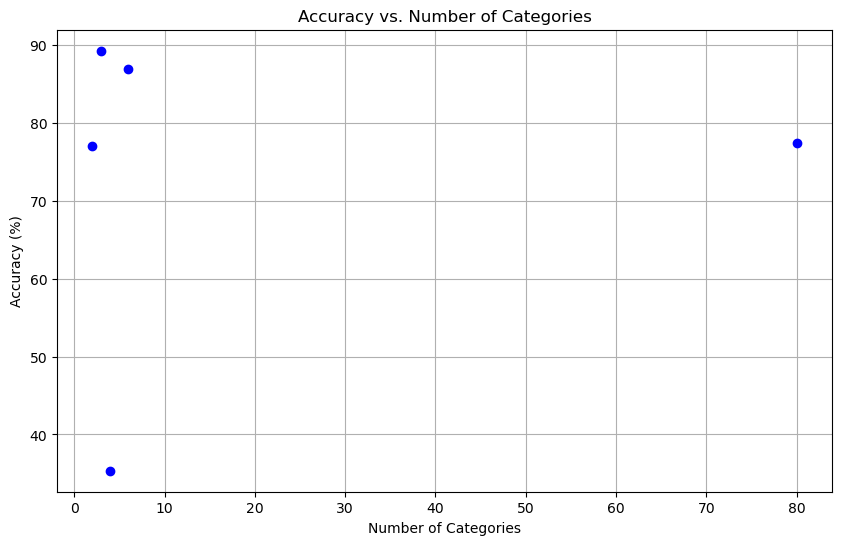

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(amount_categories, accuracies, marker='o', linestyle='None', color='blue')
plt.xlabel('Number of Categories')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Number of Categories')
plt.grid()
plt.show()